In [196]:
import requests
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [197]:
# Define the API URL
api_url = "https://api.openaq.org/v2/measurements"

# Define the query parameters
params = {
    "location_id": "380422",
    "parameter": ["pressure", "temperature", "um003", "um025", "um010", "pm10", "um100", "pm1", "um005", "humidity", "um050", "pm25"],
    "limit": 100000,
    "api_key": "bca2413f10b586fc8e29e6a7712258baf2d528cfdfc06dcba5bf1cc44e714a9c"
}

# Make the GET request
response = requests.get(api_url, params=params)


# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()
    output = data['results']
    df = pd.DataFrame(output)
    # Extract local time from date column (dictionary)
    df['local_time'] = df['date'].apply(lambda x: x['local'])
    df['local_time'] = pd.to_datetime(df['local_time'])


else:
    print("Error:", response.status_code)

df.info()
df.head()

Error: 408
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype                                 
---  ------       --------------  -----                                 
 0   locationId   10000 non-null  int64                                 
 1   location     10000 non-null  object                                
 2   parameter    10000 non-null  object                                
 3   value        10000 non-null  float64                               
 4   date         10000 non-null  object                                
 5   unit         10000 non-null  object                                
 6   coordinates  10000 non-null  object                                
 7   country      10000 non-null  object                                
 8   city         0 non-null      object                                
 9   isMobile     10000 non-null  bool                                  
 10  

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,local_time
0,380422,Tipperary Park,temperature,54.931034,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",f,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
1,380422,Tipperary Park,humidity,66.896552,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",%,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
2,380422,Tipperary Park,um003,4.667586,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
3,380422,Tipperary Park,um100,0.000000,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
4,380422,Tipperary Park,um050,0.000000,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00


## Available Parameters

In [198]:
# Get locations from API

endpoint = "https://api.openaq.org/v2/parameters"

params = {
    "limit": 1000,
    "api_key": "bca2413f10b586fc8e29e6a7712258baf2d528cfdfc06dcba5bf1cc44e714a9c"
}

# API request
response = requests.get(endpoint, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()
    output = data['results']
    parameters = pd.DataFrame(output)
else:
    print("Error:", response.status_code)


print(parameters.info())

parameters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             64 non-null     int64 
 1   name           64 non-null     object
 2   displayName    60 non-null     object
 3   description    64 non-null     object
 4   preferredUnit  64 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.6+ KB
None


,id,name,displayName,description,preferredUnit
0,1,pm10,PM10,Particulate matter less than 10 micrometers in...,µg/m³
1,2,pm25,PM2.5,Particulate matter less than 2.5 micrometers i...,µg/m³
2,3,o3,O₃ mass,Ozone mass concentration,µg/m³
3,4,co,CO mass,Carbon Monoxide mass concentration,µg/m³
4,5,no2,NO₂ mass,Nitrogen Dioxide mass concentration,µg/m³
5,6,so2,SO₂ mass,Sulfur Dioxide mass concentration,µg/m³
6,7,no2,NO₂,Nitrogen Dioxide concentration,ppm
7,8,co,CO,Carbon Monoxide concentration,ppm
8,9,so2,SO₂,Sulfur Dioxide concentration,ppm
9,10,o3,O₃,Ozone concentration,ppm


# EDA

In [199]:
import seaborn as sns
from datetime import datetime
import pytz

In [200]:
df.head(20)

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,local_time
0,380422,Tipperary Park,temperature,54.931034,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",f,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
1,380422,Tipperary Park,humidity,66.896552,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",%,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
2,380422,Tipperary Park,um003,4.667586,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
3,380422,Tipperary Park,um100,0.000000,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
4,380422,Tipperary Park,um050,0.000000,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
5,380422,Tipperary Park,pm25,2.627586,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
6,380422,Tipperary Park,pressure,1009.294828,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",mb,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
7,380422,Tipperary Park,um025,0.005517,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
8,380422,Tipperary Park,pm1,1.765517,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
9,380422,Tipperary Park,um010,0.167241,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",particles/cm³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00


In [201]:
df.columns

Index(['locationId', 'location', 'parameter', 'value', 'date', 'unit',
       'coordinates', 'country', 'city', 'isMobile', 'isAnalysis', 'entity',
       'sensorType', 'local_time'],
      dtype='object')

In [202]:
df.dtypes

locationId                                      int64
location                                       object
parameter                                      object
value                                         float64
date                                           object
unit                                           object
coordinates                                    object
country                                        object
city                                           object
isMobile                                         bool
isAnalysis                                     object
entity                                         object
sensorType                                     object
local_time     datetime64[ns, pytz.FixedOffset(-420)]
dtype: object

In [203]:
df['parameter'].unique()

array(['temperature', 'humidity', 'um003', 'um100', 'um050', 'pm25',
       'pressure', 'um025', 'pm1', 'um010', 'um005', 'pm10'], dtype=object)

In [204]:
df[df["parameter"] == "pm25"].size

11662

In [205]:
df[df["parameter"] == "pm25"].head()

,locationId,location,parameter,value,date,unit,coordinates,country,city,isMobile,isAnalysis,entity,sensorType,local_time
5,380422,Tipperary Park,pm25,2.627586,"{'utc': '2023-10-12T13:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 06:00:00-07:00
17,380422,Tipperary Park,pm25,2.556667,"{'utc': '2023-10-12T12:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 05:00:00-07:00
33,380422,Tipperary Park,pm25,2.383333,"{'utc': '2023-10-12T11:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 04:00:00-07:00
47,380422,Tipperary Park,pm25,3.632143,"{'utc': '2023-10-12T10:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 03:00:00-07:00
50,380422,Tipperary Park,pm25,4.256667,"{'utc': '2023-10-12T09:00:00+00:00', 'local': ...",µg/m³,"{'latitude': 49.208733, 'longitude': -122.9118}",CA,None,False,None,Community Organization,low-cost sensor,2023-10-12 02:00:00-07:00


In [206]:
df['value'][df["parameter"] == "pm25"].head()

5     2.627586
17    2.556667
33    2.383333
47    3.632143
50    4.256667
Name: value, dtype: float64

In [207]:
df['value'][df["parameter"] == "pm25"].describe()

count    833.000000
mean       9.592164
std        6.832923
min        0.014286
25%        4.320000
50%        8.250000
75%       12.789655
max       34.424138
Name: value, dtype: float64

In [208]:
for par in df['parameter'].unique():
    result = df['value'][df["parameter"] == par].describe()
    nan_values = df['value'][df["parameter"] == par].isna().sum()
    print(par, end='\n')
    print (result)
    print('Number of nan values:', nan_values)
    print('\n')

temperature
count    834.000000
mean      64.918252
std        6.561385
min       51.700000
25%       59.952885
50%       63.762644
75%       68.461538
max       89.882353
Name: value, dtype: float64
Number of nan values: 0


humidity
count    833.000000
mean      55.514332
std       10.410887
min       25.800000
25%       48.148148
50%       57.111111
75%       64.600000
max       71.578947
Name: value, dtype: float64
Number of nan values: 0


um003
count    834.000000
mean      12.574688
std        7.864931
min        0.935714
25%        6.646661
50%       11.035317
75%       16.435982
max       43.784138
Name: value, dtype: float64
Number of nan values: 0


um100
count    833.000000
mean       0.000251
std        0.000744
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.008276
Name: value, dtype: float64
Number of nan values: 0


um050
count    833.000000
mean       0.001592
std        0.002824
min        0.000000
25%        0.000000
50%  

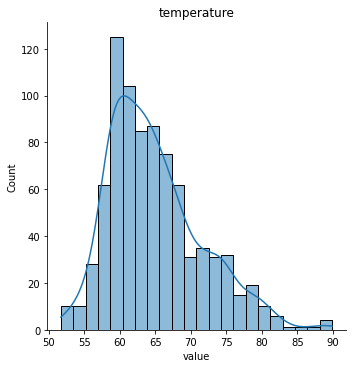

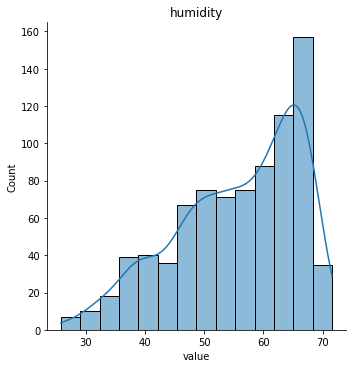

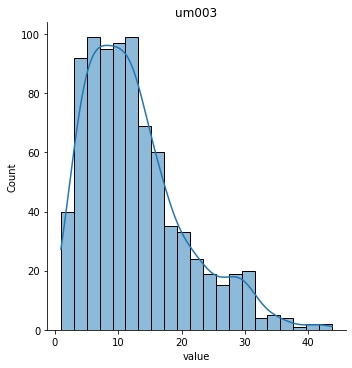

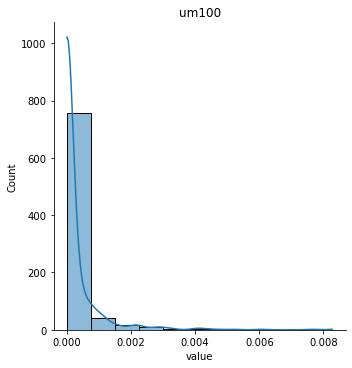

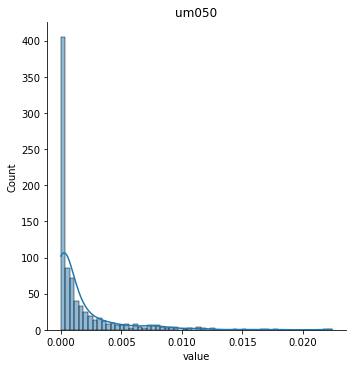

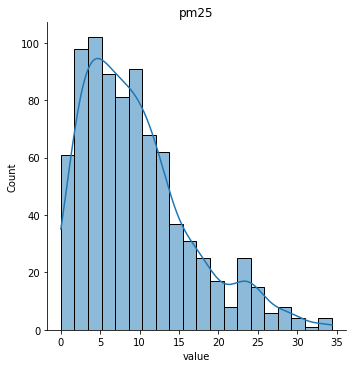

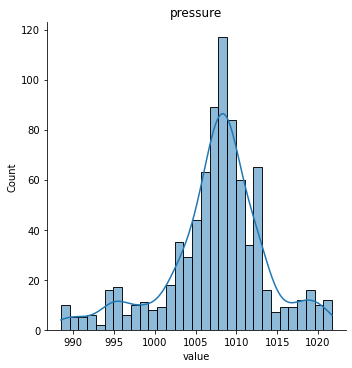

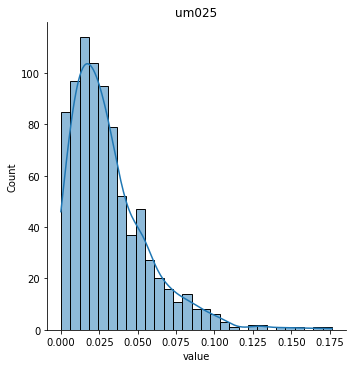

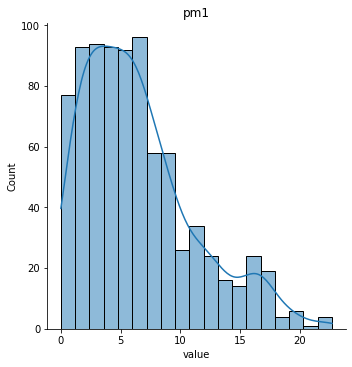

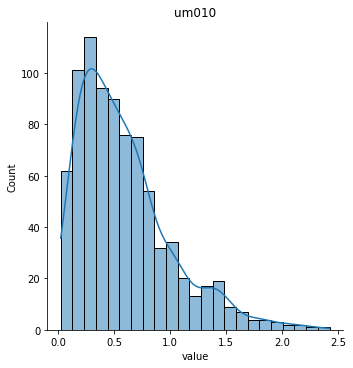

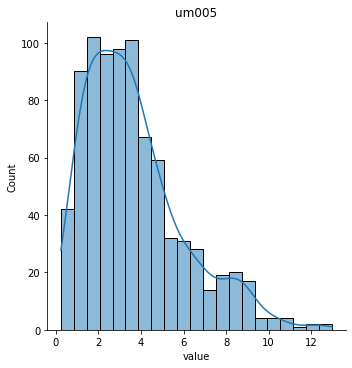

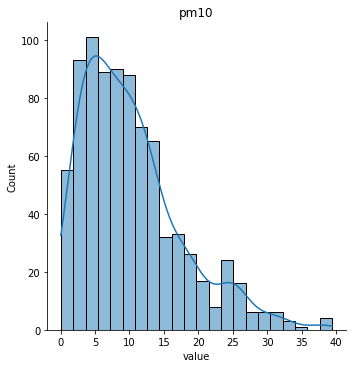

In [209]:
for par in df['parameter'].unique():
    sns.displot(df['value'][df["parameter"] == par], kde=True).set(title=par)

In [210]:
df['local_time'].min()

Timestamp('2023-09-07 13:00:00-0700', tz='pytz.FixedOffset(-420)')

In [211]:
df['local_time'].max()

Timestamp('2023-10-12 06:00:00-0700', tz='pytz.FixedOffset(-420)')

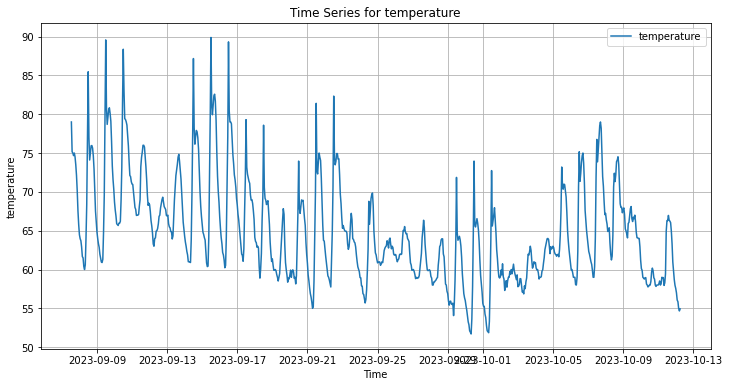

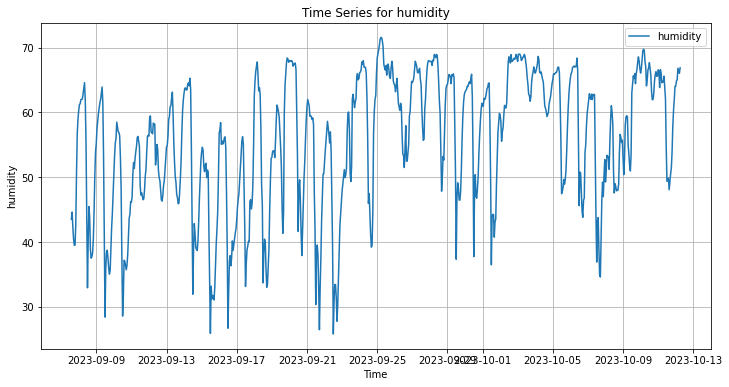

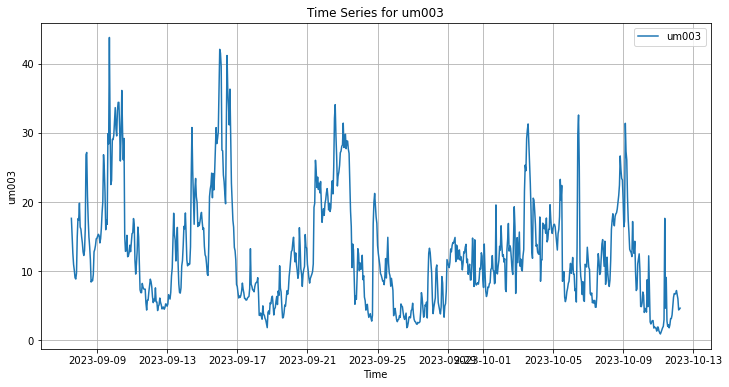

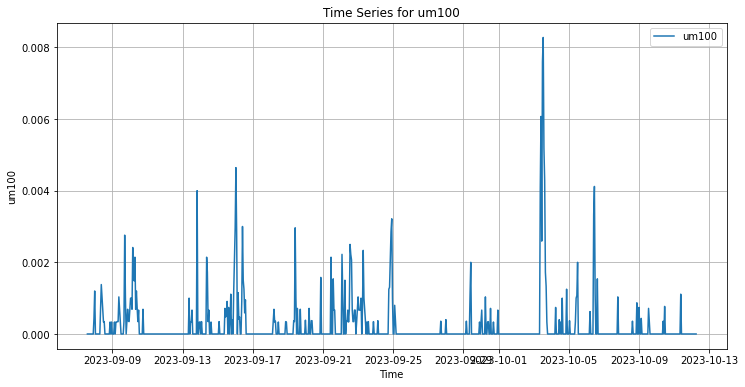

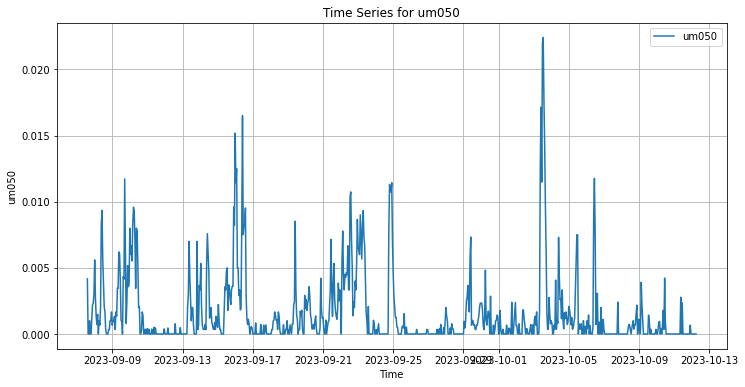

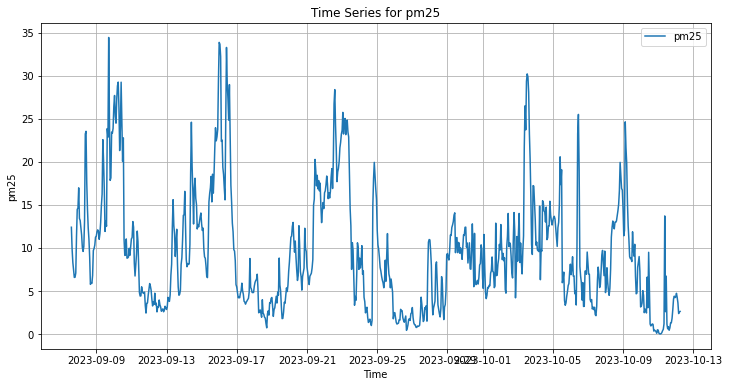

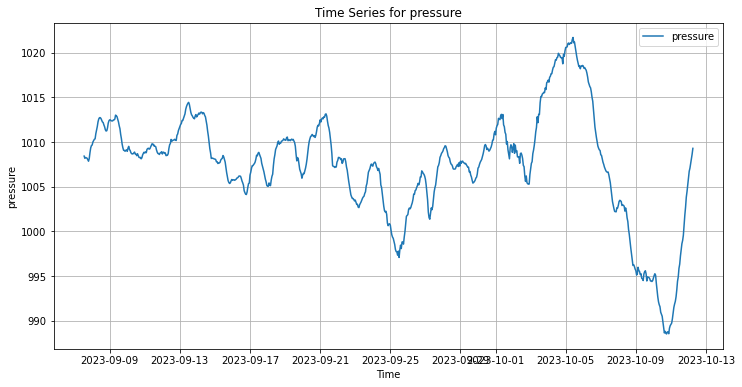

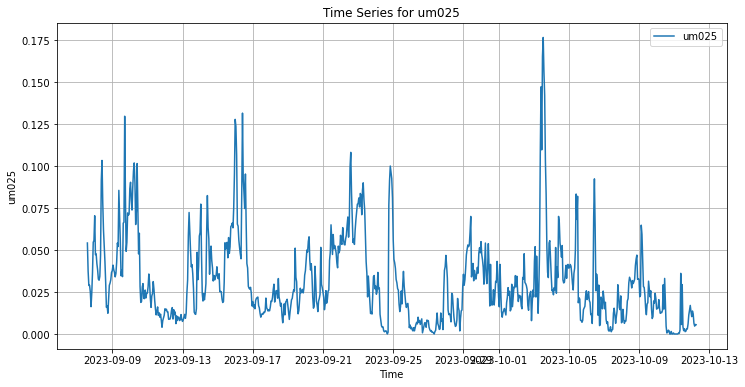

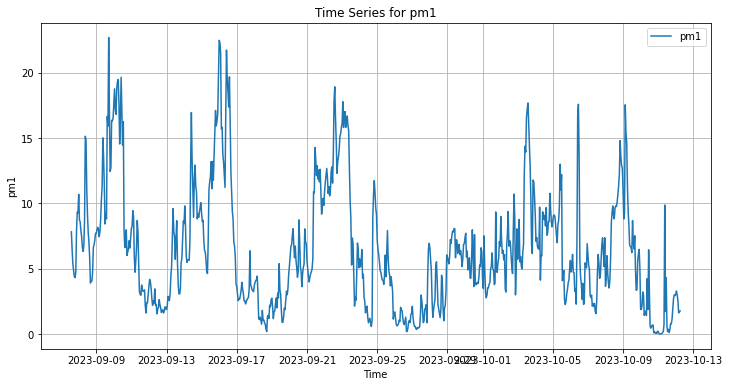

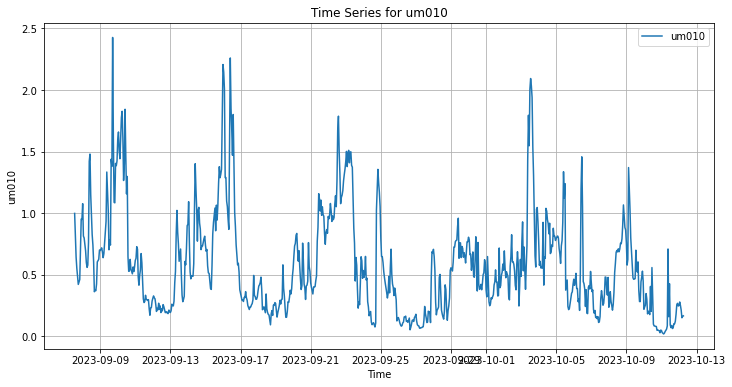

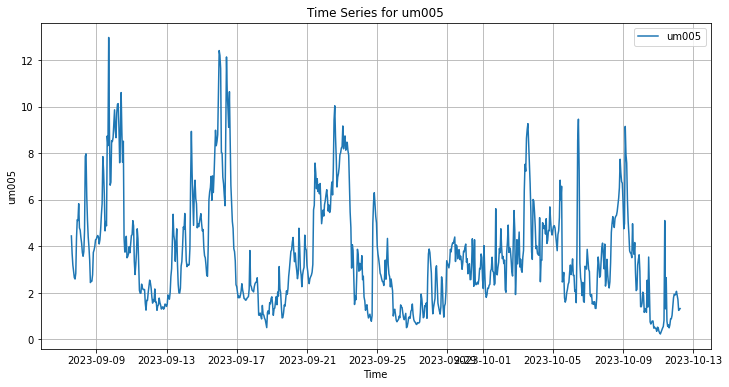

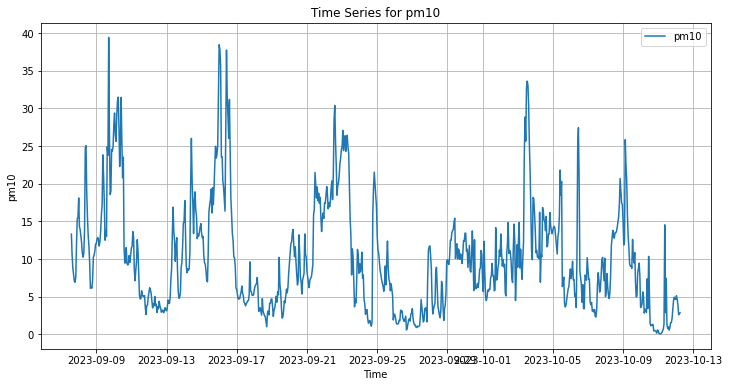

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Loop through unique parameters
for par in df['parameter'].unique():
    plt.figure(figsize=(12, 6))
    
    # Filter the DataFrame for the current parameter
    subset = df[df['parameter'] == par]
    
    # Create the plot
    plt.plot(subset['local_time'], subset['value'], label=par)
    
    plt.xlabel('Time')
    plt.ylabel(par)
    plt.grid(True)
    plt.legend()
    plt.title(f"Time Series for {par}")
    plt.show()

In [213]:
#for parameter in df['parameter'].unique():
#    locals()[parameter] = df[df["parameter"] == parameter]
    
#pm25.head()

In [214]:
pivoted_df = df.pivot_table(index=df['local_time'], columns='parameter', values='value')
pivoted_df.head(20)

parameter,humidity,pm1,pm10,pm25,pressure,temperature,um003,um005,um010,um025,um050,um100
local_time,,,,,,,,,,,,
2023-09-07 13:00:00-07:00,NaN,NaN,NaN,NaN,1008.425714,79.000000,17.647857,NaN,0.998571,NaN,NaN,NaN
2023-09-07 14:00:00-07:00,43.500000,7.816667,13.308333,12.400000,1008.175833,75.166667,15.224167,4.450000,0.835833,0.054167,0.004167,0.000000
2023-09-07 15:00:00-07:00,44.625000,6.462500,10.475000,9.825000,1008.273750,75.000000,12.616250,3.701250,0.645000,0.037500,0.000000,0.000000
2023-09-07 16:00:00-07:00,42.333333,5.377778,8.800000,8.300000,1008.238889,74.666667,10.983333,3.202222,0.552222,0.028889,0.000000,0.000000
2023-09-07 17:00:00-07:00,40.400000,4.860000,7.940000,7.420000,1008.190000,75.000000,10.139000,2.946000,0.488000,0.029000,0.001000,0.000000
2023-09-07 18:00:00-07:00,39.500000,4.412500,7.075000,6.575000,1008.011250,74.500000,9.066250,2.660000,0.422500,0.025000,0.000000,0.000000
2023-09-07 19:00:00-07:00,39.500000,4.312500,6.912500,6.600000,1007.855000,73.500000,8.878750,2.598750,0.441250,0.016250,0.000000,0.000000
2023-09-07 20:00:00-07:00,42.777778,4.722222,7.577778,7.088889,1008.164444,72.111111,9.736667,2.843333,0.462222,0.024444,0.001111,0.000000
2023-09-07 21:00:00-07:00,50.444444,7.844444,12.022222,11.344444,1008.826667,70.111111,14.918889,4.354444,0.688889,0.036667,0.002222,0.000000


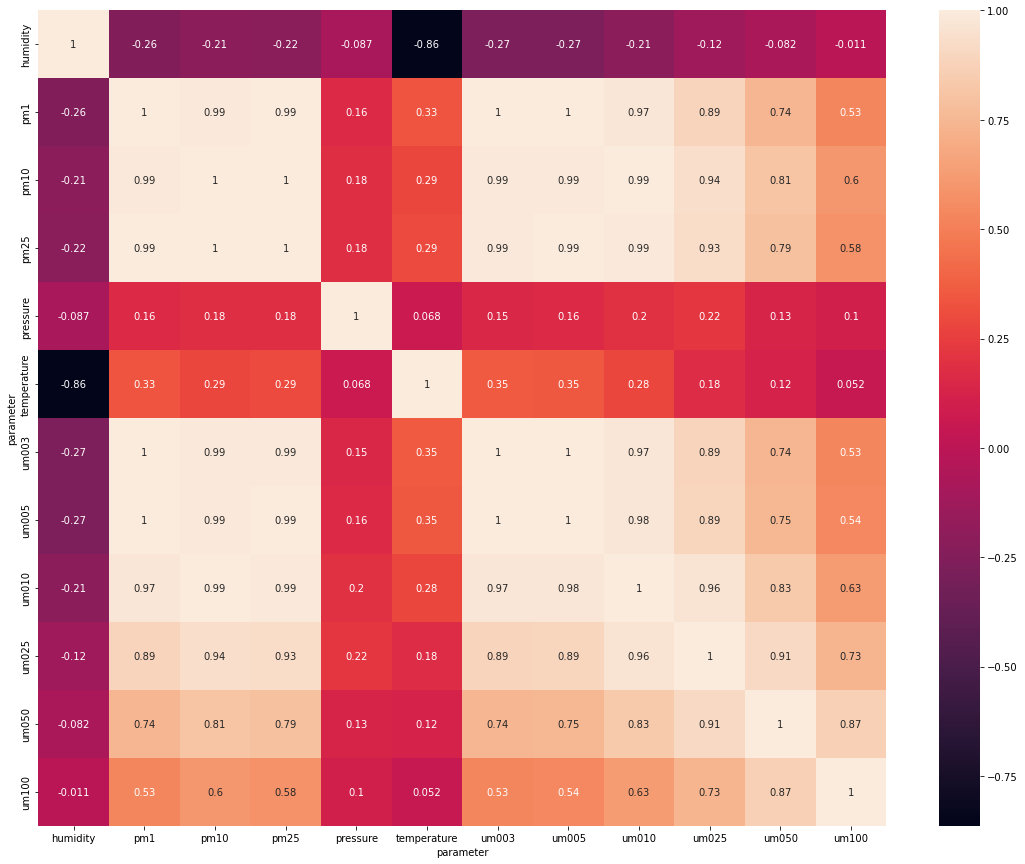

In [215]:
corr_matrix = pivoted_df.corr()
plt.figure(figsize=(19, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()